In [6]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

p = "../input/g2net-gravitational-wave-detection/train"
p_train = "../../input/g2net-gravitational-wave-detection/training_labels.csv"
p_test = "../../input/g2net-gravitational-wave-detection/sample_submission.csv"

In [7]:
df_train = pd.read_csv(p_train)

,id,target
0,00000e74ad,1
1,00001f4945,0
2,0000661522,0
3,00007a006a,0
4,0000a38978,1
...,...,...
559995,ffff9a5645,1
559996,ffffab0c27,0
559997,ffffcf161a,1
559998,ffffd2c403,0


In [9]:
train_sample = r"C:\Users\takah\Desktop\main\programming\kaggle\input\g2net-gravitational-wave-detection\train\2\1\1\211d1f7797.npy"

In [10]:
img = np.load(train_sample)

In [11]:
img.shape

(3, 4096)

In [12]:
df = pd.DataFrame(img)

In [13]:
sd

NameError: name 'sd' is not defined

In [17]:
df = df.T

,0,1,2
0,-7.982557e-21,-2.161454e-22,-3.214336e-21
1,-7.313513e-21,-4.295219e-22,-3.062667e-21
2,-7.012172e-21,-2.490577e-22,-3.087948e-21
3,-5.885581e-21,-2.721253e-22,-3.433522e-21
4,-5.273065e-21,-3.914407e-22,-3.243537e-21
...,...,...,...
4091,3.280297e-21,-1.275972e-20,1.412396e-21
4092,3.453734e-21,-1.248034e-20,1.440317e-21
4093,3.869835e-21,-1.261100e-20,9.714114e-22
4094,3.968629e-21,-1.252294e-20,9.434060e-22


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

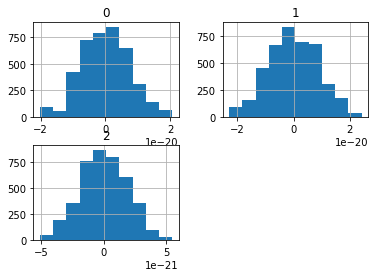

In [19]:
df.hist()

In [24]:
x = list(range(img.shape[1]))

In [25]:
df.head()

,0,1,2
0,-7.982557e-21,-2.161454e-22,-3.214336e-21
1,-7.313513e-21,-4.295219e-22,-3.062667e-21
2,-7.012172e-21,-2.490577e-22,-3.087948e-21
3,-5.885581e-21,-2.721253e-22,-3.433522e-21
4,-5.273065e-21,-3.914407e-22,-3.243537e-21


In [33]:
columns = {0:"LIGO Hanford", 1:"LIGO Livingston", 2:"Virgo"}
df = df.rename(columns=columns)
df

,LIGO Hanford,LIGO Livingston,Virgo
0,-7.982557e-21,-2.161454e-22,-3.214336e-21
1,-7.313513e-21,-4.295219e-22,-3.062667e-21
2,-7.012172e-21,-2.490577e-22,-3.087948e-21
3,-5.885581e-21,-2.721253e-22,-3.433522e-21
4,-5.273065e-21,-3.914407e-22,-3.243537e-21
...,...,...,...
4091,3.280297e-21,-1.275972e-20,1.412396e-21
4092,3.453734e-21,-1.248034e-20,1.440317e-21
4093,3.869835e-21,-1.261100e-20,9.714114e-22
4094,3.968629e-21,-1.252294e-20,9.434060e-22


<AxesSubplot:>

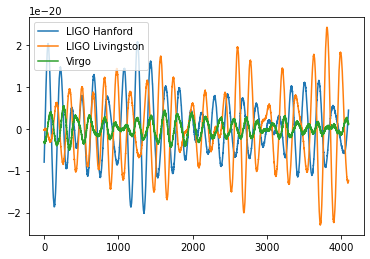

In [34]:
df.plot()

In [35]:
df_bp = df.copy()

In [37]:
from scipy.signal import butter, lfilter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq= 0.5 * fs
    low= lowcut /nyq
    high= highcut /nyq
    b, a= butter(order, [low, high], btype='band')
    y= lfilter(b, a, data)
    return y

In [38]:
fs = 2048
data = img[0]
lowcut = 30
highcut = 900
y = butter_bandpass_filter(data, lowcut, highcut, fs, order=5)

In [39]:
y

array([-3.68341705e-21, -6.82361615e-21, -2.48041070e-21, ...,
       -3.56768688e-23, -4.28721235e-23, -5.69465038e-23])

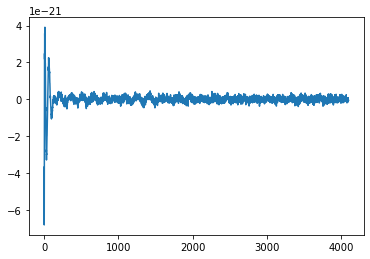

In [42]:
# plt.plot(x, data)
plt.plot(x, y)

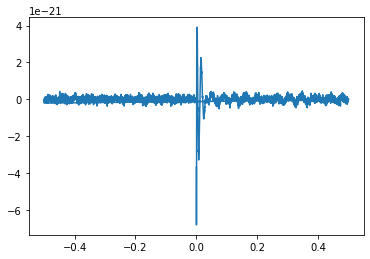

In [45]:
fk = np.fft.fft(data)
freq = np.fft.fftfreq(len(fk))
plt.plot(freq, y)

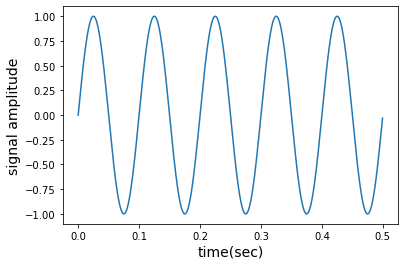

In [116]:
# 簡単な信号の作成
N = 2**10 # サンプル数
sr = 2048
dt = 1 / sr # サンプリング周期(sec):100ms =>サンプリング周波数100Hz
freq = 10 # 周波数(10Hz) =>正弦波の周期0.1sec
amp = 1 # 振幅
t = np.arange(0, N*dt, dt) # 時間軸
f = amp * np.sin(2*np.pi*freq*t) # 信号（周波数10、振幅1の正弦波）
# グラフ表示
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal amplitude', fontsize=14)
plt.plot(t, f)

In [58]:
F = np.fft.fft(f)

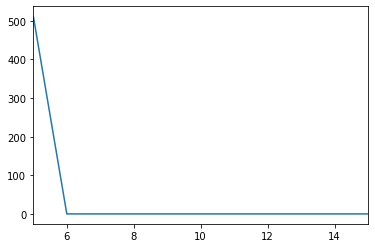

In [65]:
F_abs = np.abs(F)
xdelta = 5
plt.xlim(freq - xdelta, freq + xdelta)
plt.plot(F_abs)

In [60]:
fq = np.linspace(0, 1.0/dt, N)

In [61]:
# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)

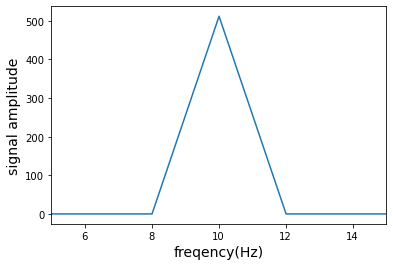

In [64]:
# 周波数軸に変更してグラフを再表示
xdelta = 5
plt.xlim(freq - xdelta, freq + xdelta)
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('signal amplitude', fontsize=14)
plt.plot(fq, F_abs)


In [205]:
def myfft(sig, sr):
    # サンプリング周波数から測定間隔に変換
    dt = 1 / sr
    # 何点測定したのか
    N = len(sig)
    
    # フーリエ変換
#     F = np.abs(np.fft.fft(sig))
    F = np.fft.fft(sig)
    # 周波数軸（横軸）を作成
    # fq = np.linspace(0, dt, N)
    fq = np.fft.fftfreq(N, dt)
    
    return fq, F

In [206]:
fq, F = myfft(f, sr=2048)

C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


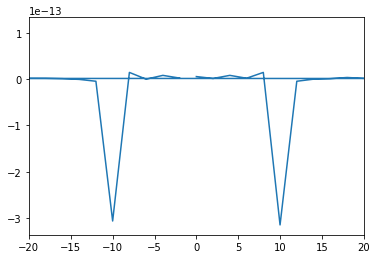

In [207]:
# fq, F
# plt.plot(f)
plt.xlim(-20, 20)
plt.plot(fq, F)

In [208]:
train_sample = r"C:\Users\takah\Desktop\main\programming\kaggle\input\g2net-gravitational-wave-detection\train\2\1\1\211d1f7797.npy"
img = np.load(train_sample)

In [209]:
img.shape

(3, 4096)

In [210]:
sig = img[0]

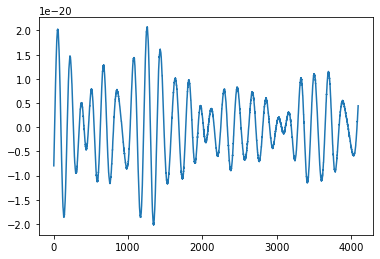

In [211]:
plt.plot(sig)

C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-30.0, 30.0)

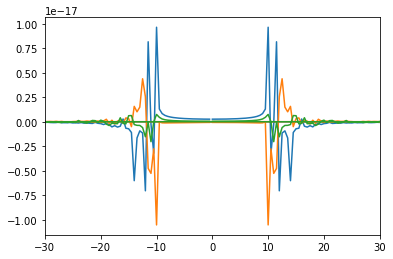

In [212]:
sr = 2048
for i in range(len(img)):
    fq, F = myfft(img[i], sr)
    plt.plot(fq, F)

plt.xlim(-30, 30)

In [213]:
y1 =  0.5 * np.sin(t * 2 * np.pi * 50)
y1 += 0.1 * np.sin(t * 2 * np.pi * (50 / 8))
y1 += 0.1 * np.sin(t * 2 * np.pi * (50 / 4))
y1 += 0.1 * np.sin(t * 2 * np.pi * (50 / 2))
y1 += 0.2 * np.sin(t * 2 * np.pi * (50 * 2))

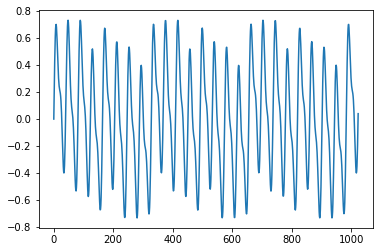

In [214]:
plt.plot(y1)

C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 100.0)

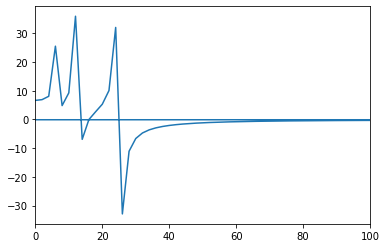

In [215]:
fq, F = myfft(y1, sr)
plt.plot(fq, F)
plt.xlim(0, 100)

In [216]:
y1 = 0
for i in range(1, 100):
    y1 +=  np.sin(t * 2 * np.pi * (50 / i))

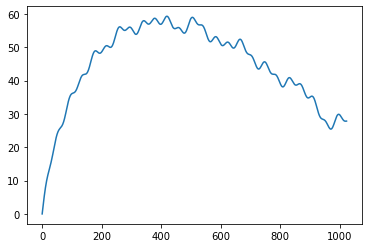

In [217]:
plt.plot(y1)

In [218]:
fq ,F = myfft(y1, sr)

C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


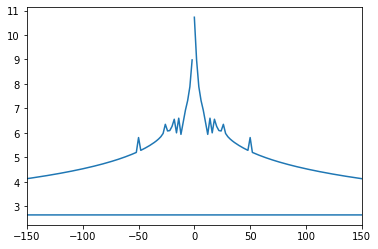

In [219]:
plt.xlim(-150, 150)
plt.plot(fq, np.log(F))

In [220]:
img

array([[-7.98255681e-21, -7.31351331e-21, -7.01217243e-21, ...,
         3.86983452e-21,  3.96862862e-21,  4.43040295e-21],
       [-2.16145430e-22, -4.29521893e-22, -2.49057730e-22, ...,
        -1.26109983e-20, -1.25229438e-20, -1.23458178e-20],
       [-3.21433600e-21, -3.06266664e-21, -3.08794816e-21, ...,
         9.71411436e-22,  9.43405987e-22,  1.24085644e-21]])

In [221]:
img.shape

(3, 4096)

C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 100.0)

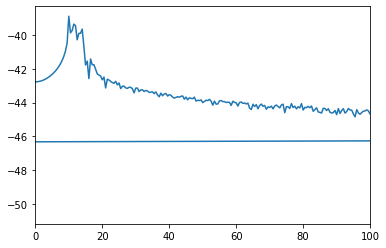

In [222]:
fq, F = myfft(img[0], sr)
plt.plot(fq, np.log(F))
plt.xlim(0,100)

In [223]:
def bandpassfilter(fq, F, fcut_low, fcut_high):
    mask = (fcut_low < fq) & (fq < fcut_high)
    F_masked = mask * F
    return fq, F_masked

C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 100.0)

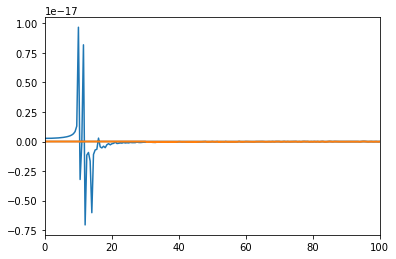

In [224]:
plt.plot(fq, F) 
fq, F_masked = bandpassfilter(fq, F, 30, 900)
plt.plot(fq, F_masked)
plt.xlim(0,100)

In [228]:
y1_inv = np.fft.ifft(F)

C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


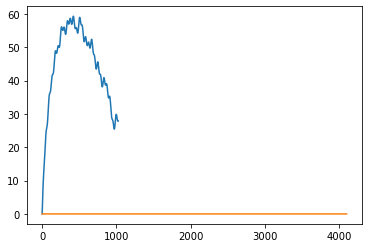

In [229]:
plt.plot(y1)
plt.plot(y1_inv)

In [227]:
y1 = 0
for i in range(1, 100):
    y1 +=  np.sin(t * 2 * np.pi * (50 / i))

In [230]:
fq ,F = myfft(y1, sr)

In [232]:
y1_inv = np.fft.ifft(F)

C:\Users\takah\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


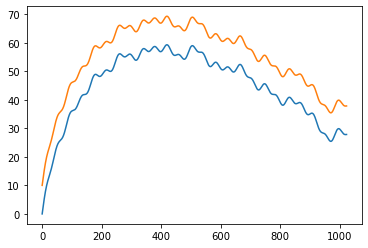

In [237]:
plt.plot(y1)
plt.plot(y1_inv + 10)

In [238]:
F

array([45476.55167176   +0.j        , -7602.70135187-2330.86163352j,
       -2631.66176417 +436.89336949j, ..., -1380.1692284  -613.70923526j,
       -2631.66176417 -436.89336949j, -7602.70135187+2330.86163352j])

In [239]:
img

array([[-7.98255681e-21, -7.31351331e-21, -7.01217243e-21, ...,
         3.86983452e-21,  3.96862862e-21,  4.43040295e-21],
       [-2.16145430e-22, -4.29521893e-22, -2.49057730e-22, ...,
        -1.26109983e-20, -1.25229438e-20, -1.23458178e-20],
       [-3.21433600e-21, -3.06266664e-21, -3.08794816e-21, ...,
         9.71411436e-22,  9.43405987e-22,  1.24085644e-21]])

(0.0, 100.0)

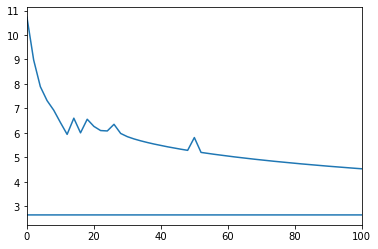

In [248]:
plt.plot(fq, np.log(np.abs(F)))
plt.xlim(0,100)

In [246]:
F.real

array([45476.55167176, -7602.70135187, -2631.66176417, ...,
       -1380.1692284 , -2631.66176417, -7602.70135187])

In [274]:
def filtering(data, sr, fcut_low=30, fcut_high=90):
    fq, F = myfft(data, sr)
    fq, F_masked = bandpassfilter(fq, F, fcut_low, fcut_high)
    data_filtered = np.fft.ifft(F_masked).real
#     data_filtered = np.fft.ifft(F).real
    return data_filtered

In [275]:
y2 = filtering(y1, sr)

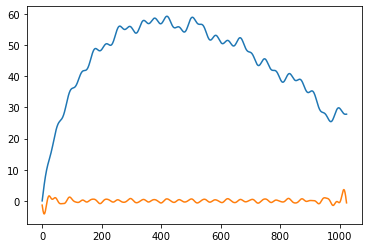

In [276]:
plt.plot(y1)
plt.plot(y2)

In [269]:
y2

array([-1.36663781, -2.05810599, -2.68517796, ...,  0.82835368,
        0.10416127, -0.63672648])

In [205]:
def myfft(sig, sr):
    # サンプリング周波数から測定間隔に変換
    dt = 1 / sr
    # 何点測定したのか
    N = len(sig)
    
    # フーリエ変換
#     F = np.abs(np.fft.fft(sig))
    F = np.fft.fft(sig)
    # 周波数軸（横軸）を作成
    # fq = np.linspace(0, dt, N)
    fq = np.fft.fftfreq(N, dt)
    
    return fq, F

In [312]:
def bandpassfilter(fq, F, fcut_low, fcut_high):
    mask = (fcut_low < fq) & (fq < fcut_high)
#     print(mask.shape, fq.shape)
    F_masked = mask * F
    return fq, F_masked

In [313]:
def filtering(data, sr, fcut_low=30, fcut_high=900):
    fq, F = myfft(data, sr)
    fq, F_masked = bandpassfilter(fq, F, fcut_low, fcut_high)
    data_filtered = np.fft.ifft(F_masked).real
#     data_filtered = np.fft.ifft(F).real
    return data_filtered

In [315]:
img_filtered = filtering(img[2], sr)
# img_filtered.shape

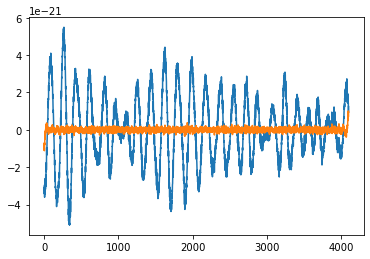

In [300]:
plt.plot(img[2])
plt.plot(img_filtered)

In [323]:
img_filtered = n

In [326]:
img_filtered.shape

(3, 4096)

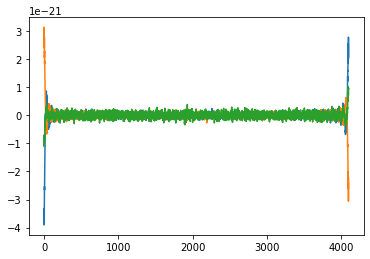

In [329]:
# plt.plot(img[0])
for i in range(3):
    plt.plot(img_filtered[i])


In [330]:
def min_max(x, axis=None):
    x_min = x.min(axis=axis, keepdims=True)
    x_max = x.max(axis=axis, keepdims=True)
    return (x - x_min) / (x_max - x_min)

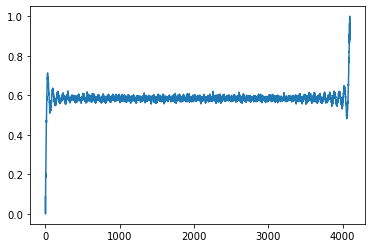

In [333]:
plt.plot(min_max(img_filtered[0]))

In [339]:
from scipy.stats import boxcox

def myboxcox(arr):
    arr_bc = arr.copy()

    eps = 1e-7
    target_shape = arr.shape
    target = arr.flatten()
    minimum = target.min()

    arr_bc = boxcox(target + minimum + eps)[0].reshape(target_shape)

    return arr_bc

(4096,) (4096,)


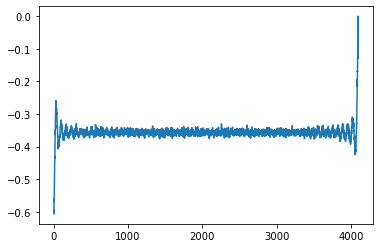

In [341]:
a = min_max(img_filtered[0])

b = myboxcox(a)
plt.plot(b)
print(a.shape, b.shape)

In [342]:
c = img_filtered[0]

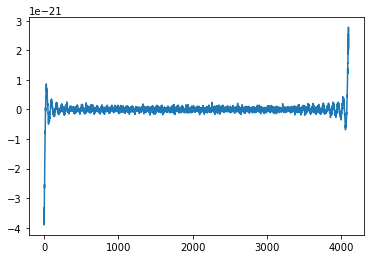

In [344]:
plt.plot(c)

In [345]:
d = c.copy()

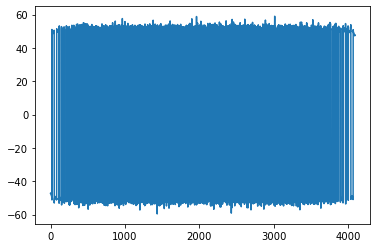

In [348]:
e = np.copysign(np.log(np.abs(d)), d)
plt.plot(e)

In [349]:
p = r"C:\Users\takah\Desktop\main\programming\kaggle\g2net-gravitational-wave-detection\train_type6\000c852f37.npy"
img = np.load(p)
img.shape

(64, 129, 3)